# DLV Group Project

In [1]:
 # General imports
import tensorflow as tf
tf.compat.v1.enable_eager_execution(
    config=None, device_policy=None, execution_mode=None
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, datetime
# Shortcuts to keras if (however from tensorflow)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard 

# Shortcut for displaying images
def plot_img(img):
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_json("/content/drive/MyDrive/InfraredSolarModules/module_metadata.json",orient="index")
df

,image_filepath,anomaly_class
13357,images/13357.jpg,No-Anomaly
13356,images/13356.jpg,No-Anomaly
19719,images/19719.jpg,No-Anomaly
11542,images/11542.jpg,No-Anomaly
11543,images/11543.jpg,No-Anomaly
...,...,...
8488,images/8488.jpg,Vegetation
8489,images/8489.jpg,Vegetation
7464,images/7464.jpg,Cracking
18065,images/18065.jpg,No-Anomaly


In [4]:
df['image_name'] = df['image_filepath'].str[7:]
df

,image_filepath,anomaly_class,image_name
13357,images/13357.jpg,No-Anomaly,13357.jpg
13356,images/13356.jpg,No-Anomaly,13356.jpg
19719,images/19719.jpg,No-Anomaly,19719.jpg
11542,images/11542.jpg,No-Anomaly,11542.jpg
11543,images/11543.jpg,No-Anomaly,11543.jpg
...,...,...,...
8488,images/8488.jpg,Vegetation,8488.jpg
8489,images/8489.jpg,Vegetation,8489.jpg
7464,images/7464.jpg,Cracking,7464.jpg
18065,images/18065.jpg,No-Anomaly,18065.jpg


In [5]:
train_df=df.sample(frac=0.8,random_state=200) # random state is a seed value
validation_df=df.drop(train_df.index)
print(train_df.info())
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 11419 to 994
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_filepath  16000 non-null  object
 1   anomaly_class   16000 non-null  object
 2   image_name      16000 non-null  object
dtypes: object(3)
memory usage: 500.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 13356 to 8487
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_filepath  4000 non-null   object
 1   anomaly_class   4000 non-null   object
 2   image_name      4000 non-null   object
dtypes: object(3)
memory usage: 125.0+ KB


In [8]:
batch_size = 20
img_size = 150
num_train_images = 1600
num_valid_images = 4000
num_classes = 12

model_scratch = Sequential()
model_scratch.add(Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
model_scratch.add(Activation('relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(Conv2D(32, (3, 3)))
model_scratch.add(Activation('relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

model_scratch.add(Conv2D(64, (3, 3)))
model_scratch.add(Activation('relu'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))

# this converts our 3D feature maps to 1D feature vectors
model_scratch.add(Flatten())  
model_scratch.add(Dense(64))
model_scratch.add(Activation('relu'))
model_scratch.add(Dropout(0.5))
model_scratch.add(Dense(num_classes))
model_scratch.add(Activation('softmax'))

model_scratch.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [9]:
batch_size = 20
datagen_train=ImageDataGenerator(rescale=1./255)
datagen_validation=ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_dataframe(
    dataframe = train_df,
    directory = "/content/drive/MyDrive/InfraredSolarModules/images/",
    x_col = "image_name",
    y_col = "anomaly_class",
    class_mode = "categorical",
    target_size = (img_size, img_size),
    batch_size = batch_size
)

validation_generator = datagen_train.flow_from_dataframe(
    dataframe = validation_df,
    directory = "/content/drive/MyDrive/InfraredSolarModules/images/",
    x_col = "image_name",
    y_col = "anomaly_class",
    class_mode = "categorical",
    target_size = (img_size, img_size),
    batch_size = batch_size,
)

Found 16000 validated image filenames belonging to 12 classes.
Found 4000 validated image filenames belonging to 12 classes.


In [10]:
history = model_scratch.fit(
    train_generator,
    epochs = 5,
    validation_data = validation_generator,
 )

Epoch 1/5
800/800 [==============================] - 4801s 6s/step - loss: 1.8741 - accuracy: 0.4968 - val_loss: 1.7311 - val_accuracy: 0.5020
Epoch 2/5
800/800 [==============================] - 446s 557ms/step - loss: 1.7908 - accuracy: 0.4994 - val_loss: 1.7133 - val_accuracy: 0.5020
Epoch 3/5
800/800 [==============================] - 453s 566ms/step - loss: 1.7471 - accuracy: 0.4998 - val_loss: 1.6656 - val_accuracy: 0.5023
Epoch 4/5
800/800 [==============================] - 454s 567ms/step - loss: 1.6996 - accuracy: 0.5018 - val_loss: 1.6214 - val_accuracy: 0.5085
Epoch 5/5
800/800 [==============================] - 453s 566ms/step - loss: 1.6454 - accuracy: 0.5131 - val_loss: 1.6191 - val_accuracy: 0.5247


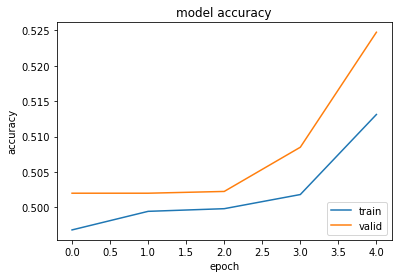

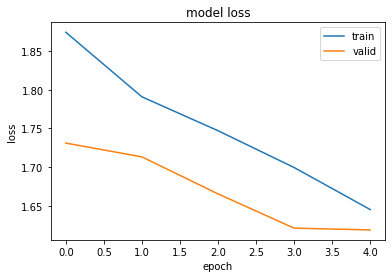

In [11]:
 plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

test